## HEALTHCARE PROJECT
- Prabhleen Kaur (0857194)
- Rajwinder Kaur (0831280)
- Ajay Haji Korbe (0852660)
- Thrivikram Sai Teja (0856337)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import Data

In [2]:
df=  pd.read_excel(r"C:\Users\ikjot_0qtl66y\Documents\Desktop\Healthcare analytics\Project\patient-cost-estimator-results-en.xlsx", sheet_name="Table 1")

## Explore data

In [3]:
df.head()  # Displays first 5 rows

,Fiscal year,Jurisdiction,Case Mix Group,Case Mix Group (description),Age group,Volume \n(typical cases),Estimated average \nhospital cost,Estimated average hospital cost \n(all age groups),Estimated average \nphysician cost,Estimated average physician cost \n(all age groups),Total \nestimated \ncost,Average \nacute LOS,Average \nALC LOS,Average \ntotal LOS
0,2017–2018,Alberta,3,Other Vascular Intervention with Nervous Syste...,1-7 Years (Paediatric),**2,12355,19779,5249.4,4551,17604.4,6.0,0.0,6.0
1,2017–2018,Alberta,3,Other Vascular Intervention with Nervous Syste...,18-59 Years (Adult),39,19487,19779,5399.5,4551,24886.5,4.6,0.4,5.0
2,2017–2018,Alberta,3,Other Vascular Intervention with Nervous Syste...,60-79 Years (Adult),101,18831,19779,4005.5,4551,22836.5,4.6,0.4,5.0
3,2017–2018,Alberta,3,Other Vascular Intervention with Nervous Syste...,8-17 Years (Paediatric),**2,12355,19779,8243.7,4551,20598.7,4.0,0.0,4.0
4,2017–2018,Alberta,3,Other Vascular Intervention with Nervous Syste...,80+ Years (Adult),31,24192,19779,5068.9,4551,29260.9,7.0,4.5,11.5


In [4]:
df.info() # Displays info about the DataFrame (column types, nulls, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113761 entries, 0 to 113760
Data columns (total 14 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Fiscal year                                         113761 non-null  object 
 1   Jurisdiction                                        113761 non-null  object 
 2   Case Mix Group                                      113761 non-null  int64  
 3   Case Mix Group (description)                        113761 non-null  object 
 4   Age group                                           113761 non-null  object 
 5   Volume 
(typical cases)                             113761 non-null  object 
 6   Estimated average 
hospital cost                    113761 non-null  int64  
 7   Estimated average hospital cost 
(all age groups)   113761 non-null  int64  
 8   Estimated average 
physician cost                   113761 non-n

In [5]:

df.describe()  # Statistical summary of numerical columns


,Case Mix Group,Estimated average \nhospital cost,Estimated average hospital cost \n(all age groups),Average \nacute LOS,Average \nALC LOS,Average \ntotal LOS
count,113761.000000,113761.000000,113761.000000,113761.000000,113761.000000,113761.000000
mean,391.225508,11424.318106,11535.911147,6.217282,0.219765,6.437427
std,243.584154,18970.741406,18048.199360,7.931571,1.150413,8.205006
min,3.000000,633.000000,638.000000,0.000000,0.000000,1.000000
25%,187.000000,4395.000000,4755.000000,2.000000,0.000000,2.100000
50%,363.000000,6944.000000,7394.000000,4.100000,0.000000,4.200000
75%,620.000000,11810.000000,12014.000000,7.400000,0.000000,7.700000
max,816.000000,532065.000000,431084.000000,185.000000,105.000000,185.000000


In [6]:
df.columns

Index(['Fiscal year', 'Jurisdiction', 'Case Mix Group',
       'Case Mix Group (description)', 'Age group ',
       'Volume \n(typical cases)', 'Estimated average \nhospital cost',
       'Estimated average hospital cost \n(all age groups)',
       'Estimated average \nphysician cost',
       'Estimated average physician cost \n(all age groups)',
       'Total \nestimated \ncost', 'Average \nacute LOS', 'Average \nALC LOS',
       'Average \ntotal LOS'],
      dtype='object')

In [7]:
df.shape

(113761, 14)

## Data Cleaning

In [8]:
import pandas as pd

# Ensure column names are clean (remove extra spaces or newlines)
df.columns = df.columns.str.strip()

# Convert 'Volume (typical cases)' to numeric, extracting only digits
df["Volume \n(typical cases)"] = (
    df["Volume \n(typical cases)"]
    .astype(str)  # Ensure it's treated as a string
    .str.extract(r"(\d+)")  # Extract only numeric values
    .astype(float)  # Convert to float
)

# Replace the en dash with a hyphen
df['Fiscal year'] = df['Fiscal year'].str.replace('–', '-', regex=False)

# Now split the column and convert to integers
df[["Start Year", "End Year"]] = df["Fiscal year"].str.split("-", expand=True).astype(int)

# Convert relevant columns to numeric, coercing errors to NaN for any non-numeric values
numeric_columns = [
    "Estimated average \nphysician cost",
    "Estimated average physician cost \n(all age groups)",
    "Total \nestimated \ncost"
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Extract Age Category (text inside parentheses)
df["Age Category"] = df["Age group"].str.extract(r"\((.*?)\)")


# Display updated DataFrame (first few rows)
print(df[["Age group","Age Category"]].head())
print(df.dtypes)


                 Age group Age Category
0   1-7 Years (Paediatric)   Paediatric
1      18-59 Years (Adult)        Adult
2      60-79 Years (Adult)        Adult
3  8-17 Years (Paediatric)   Paediatric
4        80+ Years (Adult)        Adult
Fiscal year                                             object
Jurisdiction                                            object
Case Mix Group                                           int64
Case Mix Group (description)                            object
Age group                                               object
Volume \n(typical cases)                               float64
Estimated average \nhospital cost                        int64
Estimated average hospital cost \n(all age groups)       int64
Estimated average \nphysician cost                     float64
Estimated average physician cost \n(all age groups)    float64
Total \nestimated \ncost                               float64
Average \nacute LOS                                    float64
Aver

In [9]:
df.shape

(113761, 17)

In [10]:
import numpy as np

# Step 1: Replace hyphens ('-') with NaN (Not a Number)
df.replace('-', np.nan, inplace=True)

# Step 2: Fill missing values (NaN) with the mean, median, or mode

# Fill missing values in 'Total Estimated Cost' with the mean
df['Total \nestimated \ncost'].fillna(df['Total \nestimated \ncost'].mean(), inplace=True)

# Optionally, you can fill other columns like 'Estimated average hospital cost'
df['Estimated average \nhospital cost'].fillna(df['Estimated average \nhospital cost'].mean(), inplace=True)
df['Estimated average \nphysician cost'].fillna(df['Estimated average \nphysician cost'].mean(), inplace=True)
df['Estimated average physician cost \n(all age groups)'].fillna(df['Estimated average physician cost \n(all age groups)'].mean(), inplace=True)



In [11]:

# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

# Display null values count per column
print(null_values)


Fiscal year                                            0
Jurisdiction                                           0
Case Mix Group                                         0
Case Mix Group (description)                           0
Age group                                              0
Volume \n(typical cases)                               0
Estimated average \nhospital cost                      0
Estimated average hospital cost \n(all age groups)     0
Estimated average \nphysician cost                     0
Estimated average physician cost \n(all age groups)    0
Total \nestimated \ncost                               0
Average \nacute LOS                                    0
Average \nALC LOS                                      0
Average \ntotal LOS                                    0
Start Year                                             0
End Year                                               0
Age Category                                           0
dtype: int64


In [12]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Display if there are any duplicates
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [13]:
# Replace multiple spaces with a single space and strip leading/trailing spaces
df.columns = df.columns.str.replace('  ', ' ', regex=False)  # Replace double spaces with a single space

# Optionally, you can also use the `strip()` method to remove leading and trailing spaces
df.columns = df.columns.str.strip()

# Convert all column names to lowercase for consistency (optional)
df.columns = df.columns.str.lower()

# Display the cleaned column names
print(df.columns)


Index(['fiscal year', 'jurisdiction', 'case mix group',
       'case mix group (description)', 'age group', 'volume \n(typical cases)',
       'estimated average \nhospital cost',
       'estimated average hospital cost \n(all age groups)',
       'estimated average \nphysician cost',
       'estimated average physician cost \n(all age groups)',
       'total \nestimated \ncost', 'average \nacute los', 'average \nalc los',
       'average \ntotal los', 'start year', 'end year', 'age category'],
      dtype='object')


## Outliers

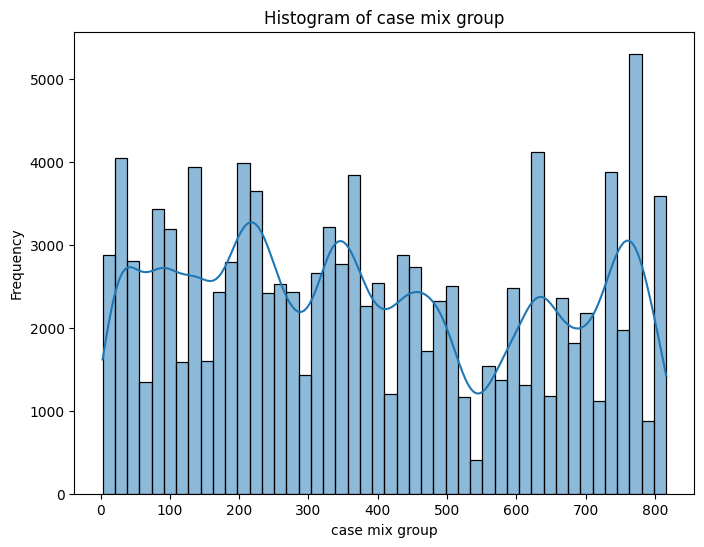

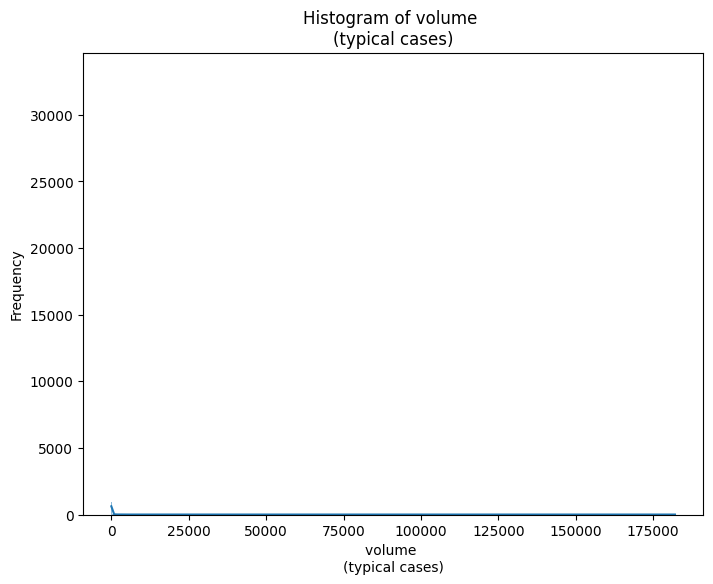

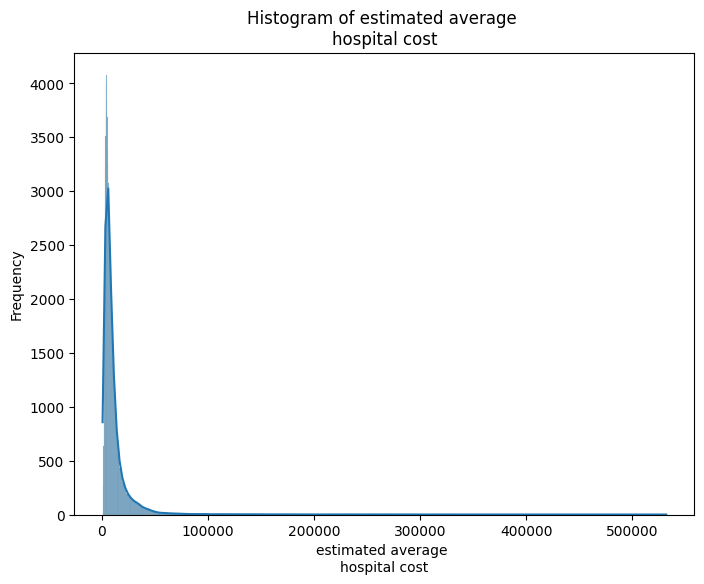

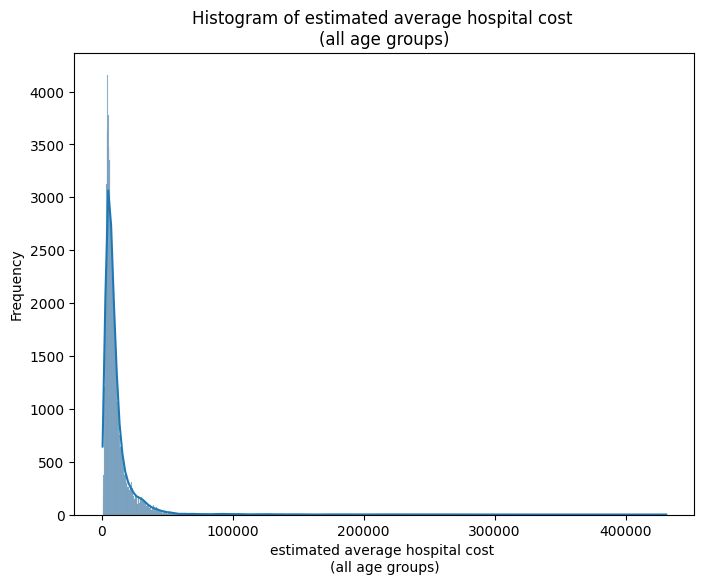

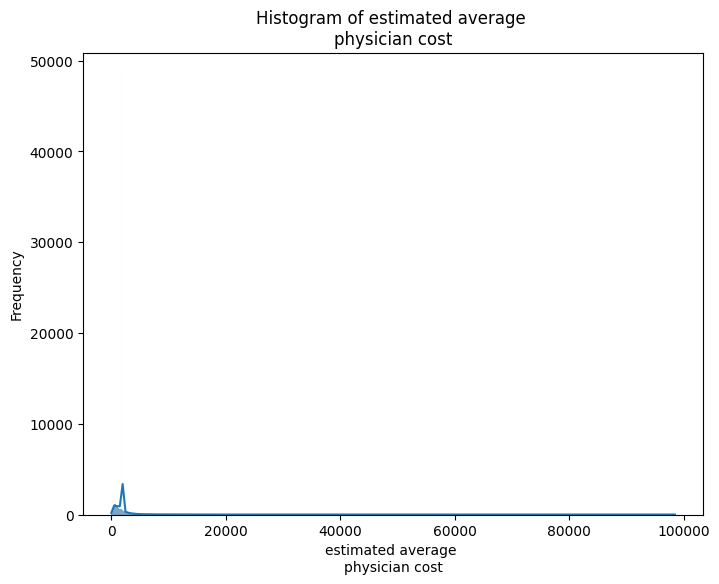

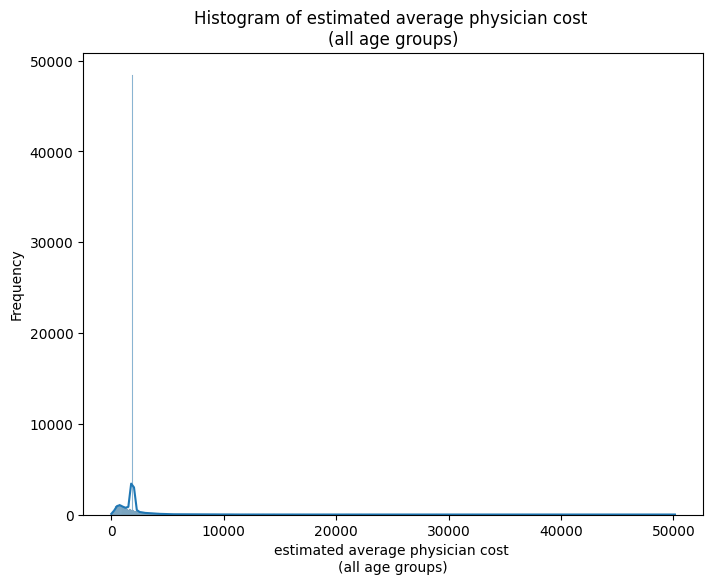

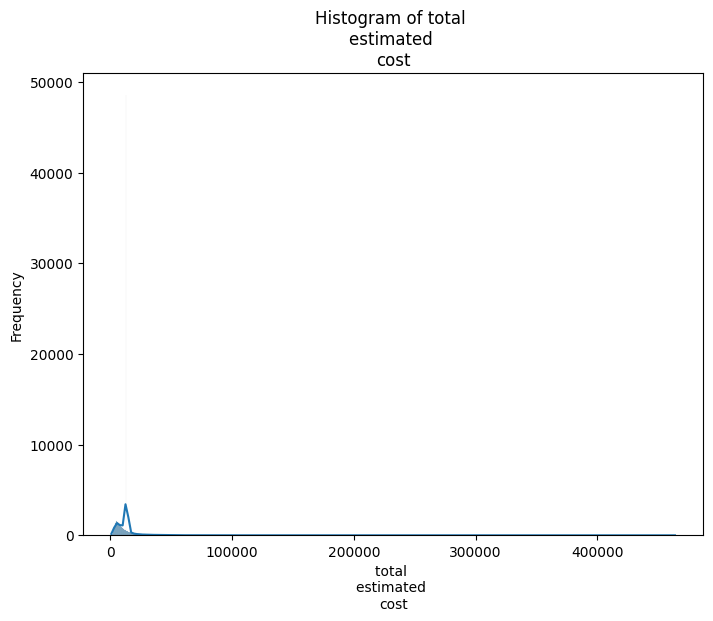

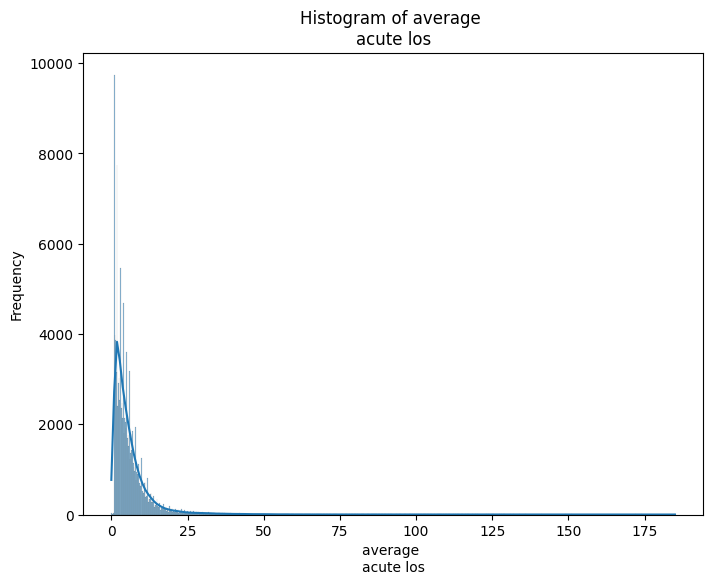

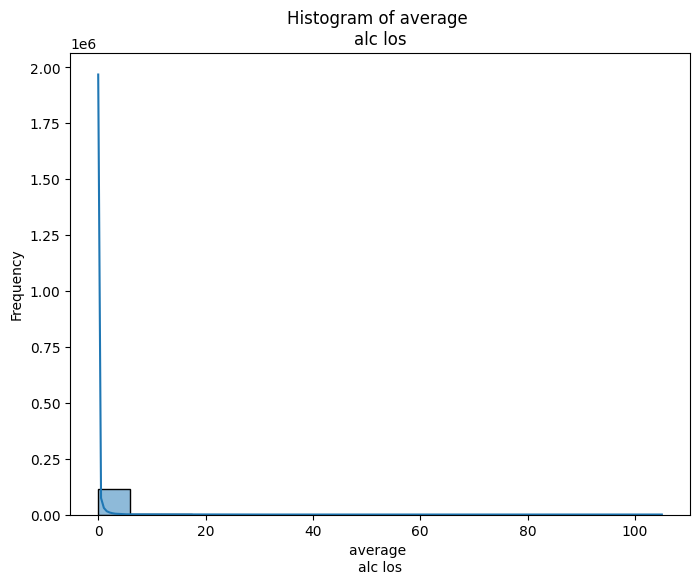

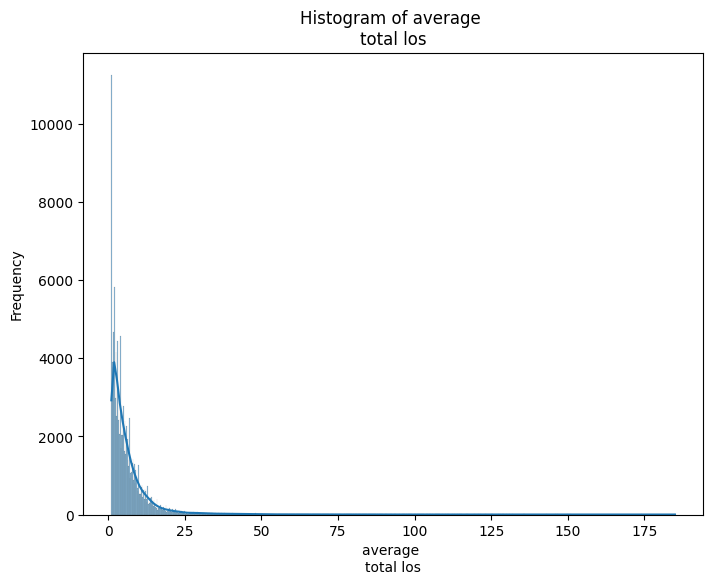

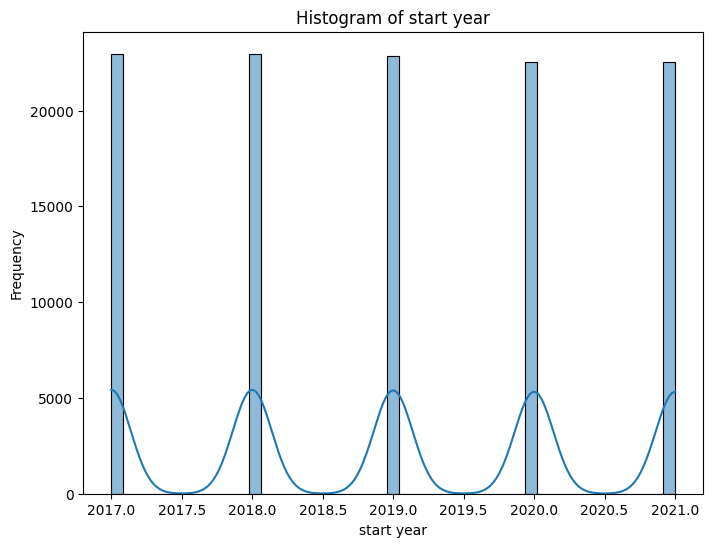

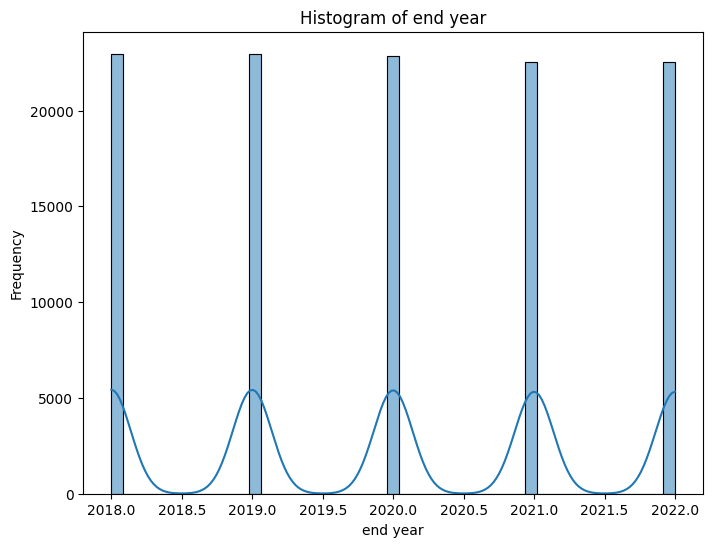

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(df[col], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [15]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=np.number).columns  # Select only numeric columns
    filtered_df = df.copy()

    for col in numeric_cols:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Handle cases where IQR is zero to prevent unnecessary filtering
        if IQR == 0:
            continue

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply filtering
        filtered_df = filtered_df.loc[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

    return filtered_df

# Apply function to remove outliers
df_no_outliers = remove_outliers_iqr(df)

# Check how many rows were removed
print("Original shape:", df.shape)
print("Shape after outlier removal:", df_no_outliers.shape)

Original shape: (113761, 17)
Shape after outlier removal: (74547, 17)


In [16]:
df_no_outliers.head()

,fiscal year,jurisdiction,case mix group,case mix group (description),age group,volume \n(typical cases),estimated average \nhospital cost,estimated average hospital cost \n(all age groups),estimated average \nphysician cost,estimated average physician cost \n(all age groups),total \nestimated \ncost,average \nacute los,average \nalc los,average \ntotal los,start year,end year,age category
6,2017-2018,British Columbia,3,Other Vascular Intervention with Nervous Syste...,18-59 Years (Adult),32.0,14346,15847,1754.3,1877.1,16100.3,6.1,0.1,6.1,2017,2018,Adult
7,2017-2018,British Columbia,3,Other Vascular Intervention with Nervous Syste...,60-79 Years (Adult),89.0,14659,15847,1818.2,1877.1,16477.2,4.6,0.2,4.8,2017,2018,Adult
8,2017-2018,British Columbia,3,Other Vascular Intervention with Nervous Syste...,80+ Years (Adult),39.0,19051,15847,2119.2,1877.1,21170.2,9.9,0.3,10.2,2017,2018,Adult
9,2017-2018,Manitoba,3,Other Vascular Intervention with Nervous Syste...,18-59 Years (Adult),11.0,15627,12805,3162.6,2605.7,18789.6,6.5,0.8,7.3,2017,2018,Adult
10,2017-2018,Manitoba,3,Other Vascular Intervention with Nervous Syste...,60-79 Years (Adult),31.0,12428,12805,2497.2,2605.7,14925.2,4.2,0.0,4.2,2017,2018,Adult


#### Estimated average hospital cost is the age group of only 18-59 years. whereas estimated average hospital cost for all age groups are the all ages from newborn to adult.

## EDA

In [17]:
# Remove \n, extra spaces, and standardize column names
df_no_outliers.columns = df_no_outliers.columns.str.replace(r"\n", " ", regex=True)  # Remove newlines
df_no_outliers.columns = df_no_outliers.columns.str.strip().str.replace(r"\s+", " ", regex=True)  # Remove extra spaces
df_no_outliers.columns = df_no_outliers.columns.str.lower().str.replace(" ", "_")  # Convert to lowercase and replace spaces with underscores

# Display updated column names
print(df_no_outliers.columns)


Index(['fiscal_year', 'jurisdiction', 'case_mix_group',
       'case_mix_group_(description)', 'age_group', 'volume_(typical_cases)',
       'estimated_average_hospital_cost',
       'estimated_average_hospital_cost_(all_age_groups)',
       'estimated_average_physician_cost',
       'estimated_average_physician_cost_(all_age_groups)',
       'total_estimated_cost', 'average_acute_los', 'average_alc_los',
       'average_total_los', 'start_year', 'end_year', 'age_category'],
      dtype='object')


In [18]:
# Group by jurisdiction and get the mean of 'estimated average hospital cost'
avg_hospital_cost = df_no_outliers.groupby('jurisdiction')['estimated_average_hospital_cost'].mean()
print(avg_hospital_cost)

jurisdiction
Alberta                      7150.606667
British Columbia             6837.538808
Canada                       7253.023876
Manitoba                     6198.522321
New Brunswick                5813.438386
Newfoundland and Labrador    6048.470223
Northwest Territories        8249.493967
Nova Scotia                  6334.104795
Ontario                      5908.064175
Prince Edward Island         6031.817474
Quebec                       7257.190001
Saskatchewan                 6860.818398
Yukon                        6495.326007
Name: estimated_average_hospital_cost, dtype: float64


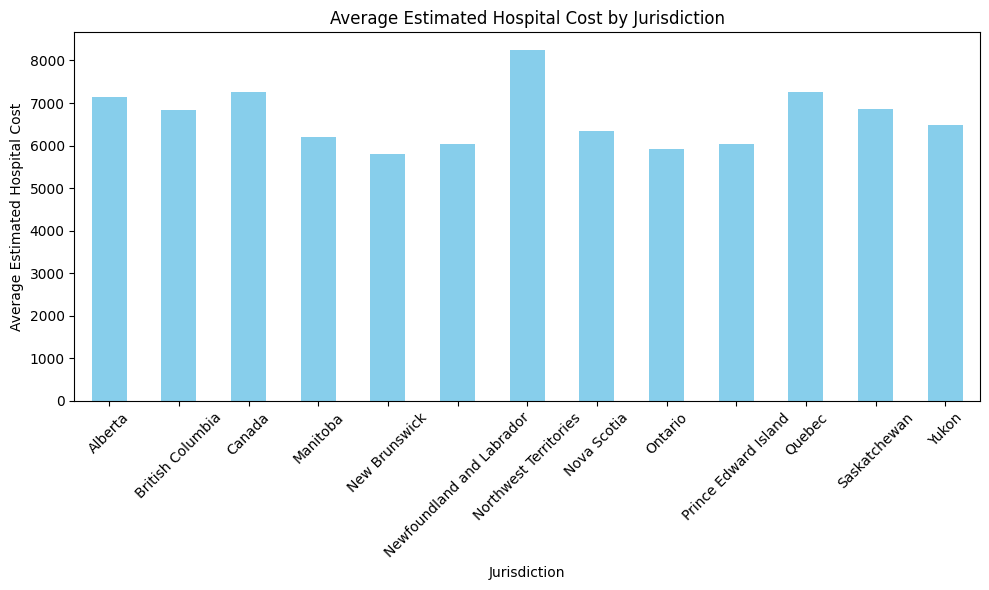

In [19]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
avg_hospital_cost.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Estimated Hospital Cost by Jurisdiction')
plt.xlabel('Jurisdiction')
plt.ylabel('Average Estimated Hospital Cost')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
# Correlation matrix for numerical variables
numerical_columns = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_no_outliers[numerical_columns].corr()
print("\nCorrelation matrix for numerical variables:")
corr_matrix


Correlation matrix for numerical variables:


,case_mix_group,volume_(typical_cases),estimated_average_hospital_cost,estimated_average_hospital_cost_(all_age_groups),estimated_average_physician_cost,estimated_average_physician_cost_(all_age_groups),total_estimated_cost,average_acute_los,average_alc_los,average_total_los
case_mix_group,1.000000,0.006837,-0.057524,-0.049154,-0.082806,-0.085687,-0.039623,-0.005158,0.090787,0.009177
volume_(typical_cases),0.006837,1.000000,0.036041,-0.011287,0.002961,-0.030429,-0.028711,0.134575,0.093682,0.144044
estimated_average_hospital_cost,-0.057524,0.036041,1.000000,0.837301,0.305140,0.318256,0.550294,0.572602,0.102948,0.565952
estimated_average_hospital_cost_(all_age_groups),-0.049154,-0.011287,0.837301,1.000000,0.283985,0.359074,0.469216,0.449835,0.070133,0.442925
estimated_average_physician_cost,-0.082806,0.002961,0.305140,0.283985,1.000000,0.897979,0.741062,0.075228,-0.055516,0.063598
estimated_average_physician_cost_(all_age_groups),-0.085687,-0.030429,0.318256,0.359074,0.897979,1.000000,0.729640,0.017656,-0.073559,0.005491
total_estimated_cost,-0.039623,-0.028711,0.550294,0.469216,0.741062,0.729640,1.000000,0.288787,0.020099,0.280456
average_acute_los,-0.005158,0.134575,0.572602,0.449835,0.075228,0.017656,0.288787,1.000000,0.178508,0.988182
average_alc_los,0.090787,0.093682,0.102948,0.070133,-0.055516,-0.073559,0.020099,0.178508,1.000000,0.327051
average_total_los,0.009177,0.144044,0.565952,0.442925,0.063598,0.005491,0.280456,0.988182,0.327051,1.000000


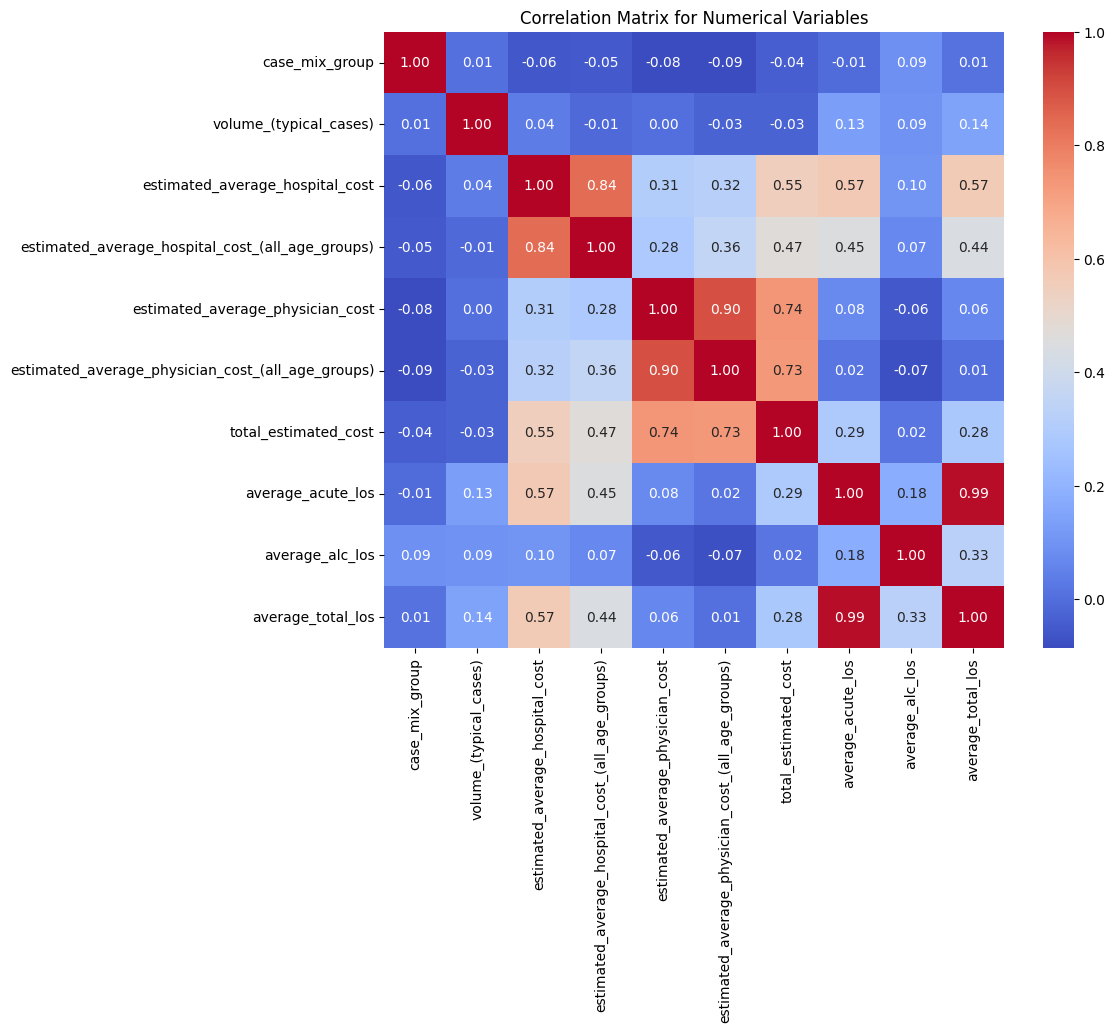

In [21]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

C:\Users\ikjot_0qtl66y\AppData\Local\Temp\ipykernel_28948\4132414233.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers, x='binned_age_group', palette='viridis')


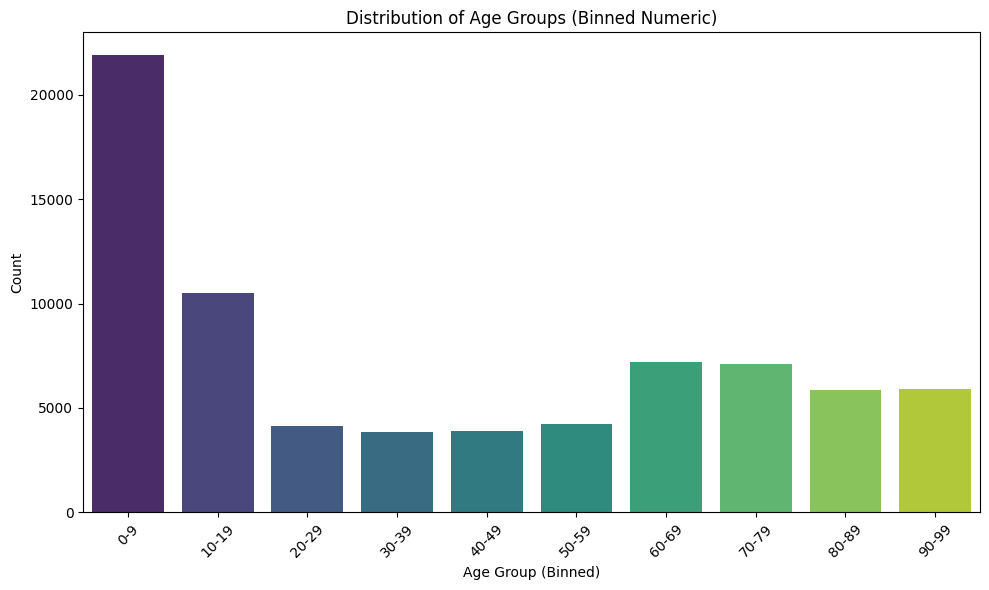

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to assign random ages based on age group
def assign_random_age(age_group):
    if age_group == "0 Days (Newborns)":
        return 0
    elif age_group == "0-7 Days (Neonates)":
        return np.random.randint(0, 8)
    elif age_group == "8-28 Days (Neonates)":
        return np.random.randint(8, 29)
    elif age_group == "29-364 Days (Paediatric)":
        return np.random.randint(1, 2)  # Approx 1 year max
    elif age_group == "1-7 Years (Paediatric)":
        return np.random.randint(1, 8)
    elif age_group == "8-17 Years (Paediatric)":
        return np.random.randint(8, 18)
    elif age_group == "18-59 Years (Adult)":
        return np.random.randint(18, 60)
    elif age_group == "60-79 Years (Adult)":
        return np.random.randint(60, 80)
    elif age_group == "80+ Years (Adult)":
        return np.random.randint(80, 101)
    else:
        return np.nan  # For unexpected values

# Apply the function to assign numeric ages
df_no_outliers['age_numeric'] = df_no_outliers['age_group'].apply(assign_random_age)

# Create bins: 0-9, 10-19, ..., 90-99
bin_edges = range(0, 110, 10)
bin_labels = [f'{i}-{i+9}' for i in bin_edges[:-1]]

# Apply binning
df_no_outliers['binned_age_group'] = pd.cut(df_no_outliers['age_numeric'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_no_outliers, x='binned_age_group', palette='viridis')

plt.xticks(rotation=45)
plt.title('Distribution of Age Groups (Binned Numeric)')
plt.xlabel('Age Group (Binned)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [23]:
df_no_outliers

,fiscal_year,jurisdiction,case_mix_group,case_mix_group_(description),age_group,volume_(typical_cases),estimated_average_hospital_cost,estimated_average_hospital_cost_(all_age_groups),estimated_average_physician_cost,estimated_average_physician_cost_(all_age_groups),total_estimated_cost,average_acute_los,average_alc_los,average_total_los,start_year,end_year,age_category,age_numeric,binned_age_group
6,2017-2018,British Columbia,3,Other Vascular Intervention with Nervous Syste...,18-59 Years (Adult),32.0,14346,15847,1754.300000,1877.100000,16100.300000,6.1,0.1,6.1,2017,2018,Adult,54,50-59
7,2017-2018,British Columbia,3,Other Vascular Intervention with Nervous Syste...,60-79 Years (Adult),89.0,14659,15847,1818.200000,1877.100000,16477.200000,4.6,0.2,4.8,2017,2018,Adult,76,70-79
8,2017-2018,British Columbia,3,Other Vascular Intervention with Nervous Syste...,80+ Years (Adult),39.0,19051,15847,2119.200000,1877.100000,21170.200000,9.9,0.3,10.2,2017,2018,Adult,97,90-99
9,2017-2018,Manitoba,3,Other Vascular Intervention with Nervous Syste...,18-59 Years (Adult),11.0,15627,12805,3162.600000,2605.700000,18789.600000,6.5,0.8,7.3,2017,2018,Adult,24,20-29
10,2017-2018,Manitoba,3,Other Vascular Intervention with Nervous Syste...,60-79 Years (Adult),31.0,12428,12805,2497.200000,2605.700000,14925.200000,4.2,0.0,4.2,2017,2018,Adult,61,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113756,2021-2022,Quebec,816,Pain Management Planning,18-59 Years (Adult),7.0,7952,11749,1863.844861,1887.915183,13077.604347,4.4,0.0,4.4,2021,2022,Adult,29,20-29
113757,2021-2022,Quebec,816,Pain Management Planning,60-79 Years (Adult),7.0,12212,11749,1863.844861,1887.915183,13077.604347,9.4,0.0,9.4,2021,2022,Adult,76,70-79
113758,2021-2022,Quebec,816,Pain Management Planning,80+ Years (Adult),3.0,19527,11749,1863.844861,1887.915183,13077.604347,7.0,0.0,7.0,2021,2022,Adult,99,90-99
113759,2021-2022,Yukon,816,Pain Management Planning,60-79 Years (Adult),6.0,10407,9716,1863.844861,1887.915183,13077.604347,8.0,0.0,8.0,2021,2022,Adult,78,70-79


C:\Users\ikjot_0qtl66y\AppData\Local\Temp\ipykernel_28948\4000653320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers, x='binned_age_group', y='estimated_average_hospital_cost', palette='viridis')


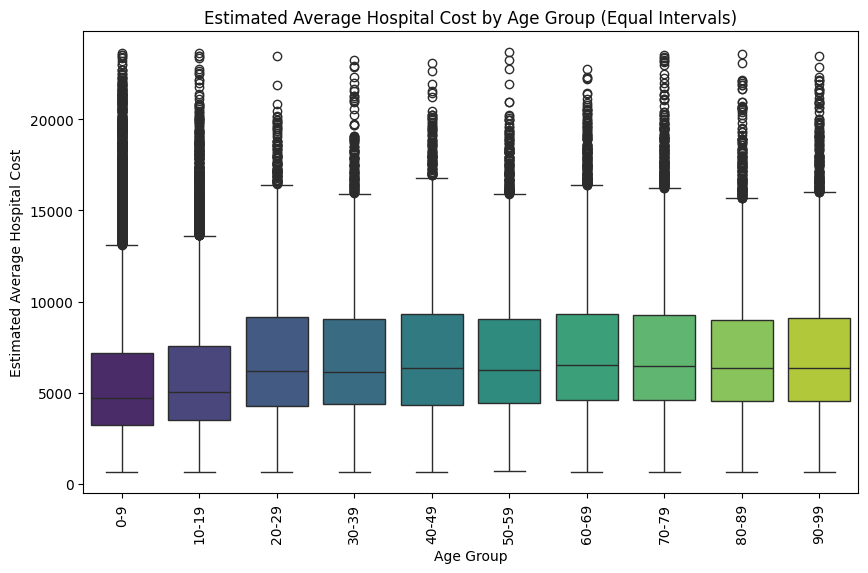

In [24]:
# Create the box plot using equal interval age groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='binned_age_group', y='estimated_average_hospital_cost', palette='viridis')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Estimated Average Hospital Cost by Age Group (Equal Intervals)')
plt.xlabel('Age Group')
plt.ylabel('Estimated Average Hospital Cost')
plt.show()

## Statistical Analysis

In [25]:
df_no_outliers.columns

Index(['fiscal_year', 'jurisdiction', 'case_mix_group',
       'case_mix_group_(description)', 'age_group', 'volume_(typical_cases)',
       'estimated_average_hospital_cost',
       'estimated_average_hospital_cost_(all_age_groups)',
       'estimated_average_physician_cost',
       'estimated_average_physician_cost_(all_age_groups)',
       'total_estimated_cost', 'average_acute_los', 'average_alc_los',
       'average_total_los', 'start_year', 'end_year', 'age_category',
       'age_numeric', 'binned_age_group'],
      dtype='object')

In [26]:
# Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
df_no_outliers.describe(include=['object'])


Summary statistics for categorical columns:


,fiscal_year,jurisdiction,case_mix_group_(description),age_group,age_category
count,74547,74547,74547,74547,74547
unique,5,13,480,9,4
top,2017-2018,Nova Scotia,Fracture of Skull/Facial Bone,18-59 Years (Adult),Adult
freq,15278,7195,313,16330,43103


In [27]:
# Chi-square test for categorical variables
# Example: Test the independence between 'age group' and 'jurisdiction'
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_no_outliers['age_group'], df_no_outliers['jurisdiction'])
print("\nContingency table for 'age group' and 'jurisdiction':")
contingency_table



Contingency table for 'age group' and 'jurisdiction':


jurisdiction,Alberta,British Columbia,Canada,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
age_group,,,,,,,,,,,,,
0 Days (Newborns),29,31,3,38,63,74,63,59,10,72,33,42,71
0-7 Days (Neonates),70,74,46,69,59,51,31,68,58,25,67,58,19
1-7 Years (Paediatric),952,1079,1235,847,551,557,179,848,1203,299,1275,873,118
18-59 Years (Adult),1036,1354,374,1595,1765,1678,941,1748,849,1301,1136,1635,918
29-364 Days (Paediatric),638,676,1064,496,264,285,121,496,848,126,904,529,40
60-79 Years (Adult),1006,1185,415,1442,1545,1500,653,1554,799,1143,906,1533,728
8-17 Years (Paediatric),1180,1390,1449,1170,886,862,267,1124,1448,396,1516,1128,196
8-28 Days (Neonates),64,71,48,59,54,44,23,61,61,28,61,57,15
80+ Years (Adult),1025,1239,769,1161,1232,1061,291,1237,957,719,1023,1298,352


In [28]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2}, P-value: {p}")

# Null Hypothesis: 'age group' and 'jurisdiction' are independent.
if p < 0.05:
    print("Reject the null hypothesis: 'age group' and 'jurisdiction' are dependent.")
else:
    print("Fail to reject the null hypothesis: 'age group' and 'jurisdiction' are independent.")


Chi-square statistic: 7615.1695493590105, P-value: 0.0
Reject the null hypothesis: 'age group' and 'jurisdiction' are dependent.


In [29]:
# Hypothesis Testing: t-test for two independent samples
# Example: Compare the mean 'Estimated average hospital cost' between two age groups
age_group_1 = df_no_outliers[df_no_outliers['age_group'] == '18-59 Years (Adult)']['estimated_average_hospital_cost']
age_group_2 = df_no_outliers[df_no_outliers['age_group'] == '60-79 Years (Adult)']['estimated_average_hospital_cost']

In [30]:
from scipy import stats


In [31]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(age_group_1, age_group_2, nan_policy='omit')
print(f"\nT-statistic: {t_stat}, P-value: {p_value}")

# Null Hypothesis: There is no significant difference in the mean hospital cost between the two age groups.
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the mean hospital cost between the two age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean hospital cost between the two age groups.")


T-statistic: -4.4655975560202865, P-value: 8.012965744207073e-06
Reject the null hypothesis: There is a significant difference in the mean hospital cost between the two age groups.


In [32]:
# ANOVA for comparing means across multiple groups
# Example: Compare the mean 'Estimated average hospital cost' across all age groups
from scipy.stats import f_oneway

# Group the data by 'age group' and extract the 'Estimated average hospital cost'
age_groups = [df_no_outliers[df_no_outliers['age_group'] == age]['estimated_average_hospital_cost'] for age in df_no_outliers['age_group'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*age_groups)
print(f"\nANOVA F-statistic: {f_stat}, P-value: {p_value}")

# Null Hypothesis: There is no significant difference in the mean hospital cost across age groups.
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the mean hospital cost across age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean hospital cost across age groups.")


ANOVA F-statistic: 360.79571468382, P-value: 0.0
Reject the null hypothesis: There is a significant difference in the mean hospital cost across age groups.


## Feature Selection

In [33]:
df_no_outliers.columns

Index(['fiscal_year', 'jurisdiction', 'case_mix_group',
       'case_mix_group_(description)', 'age_group', 'volume_(typical_cases)',
       'estimated_average_hospital_cost',
       'estimated_average_hospital_cost_(all_age_groups)',
       'estimated_average_physician_cost',
       'estimated_average_physician_cost_(all_age_groups)',
       'total_estimated_cost', 'average_acute_los', 'average_alc_los',
       'average_total_los', 'start_year', 'end_year', 'age_category',
       'age_numeric', 'binned_age_group'],
      dtype='object')

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop unnecessary columns
a = df_no_outliers.drop(columns=["start_year", "end_year", "fiscal_year"])  

# Encode categorical features using Label Encoding
categorical_cols = ["jurisdiction", "case_mix_group_(description)", "age_group", "age_category","case_mix_group"]
le = LabelEncoder()

for col in categorical_cols:
    df_no_outliers[col] = le.fit_transform(df_no_outliers[col])

# Standardize numerical features (except target variable)
num_cols = ["volume_(typical_cases)", "estimated_average_hospital_cost_(all_age_groups)","estimated_average_hospital_cost",
            "estimated_average_physician_cost", "estimated_average_physician_cost_(all_age_groups)", "average_acute_los", 
            "average_alc_los", "average_total_los"]

scaler = StandardScaler()
df_no_outliers[num_cols] = scaler.fit_transform(df_no_outliers[num_cols])

# Define features and target variable
X = df_no_outliers.drop(columns=["total_estimated_cost"])  
y = df_no_outliers["total_estimated_cost"]


In [35]:
# Check if any column in X contains non-numeric data
non_numeric_cols = X.select_dtypes(include=["object"]).columns
print(f"Non-numeric columns in X: {non_numeric_cols}")


Non-numeric columns in X: Index(['fiscal_year'], dtype='object')


In [36]:
# Ensure the target variable is numeric
df_no_outliers["total_estimated_cost"] = pd.to_numeric(df_no_outliers["total_estimated_cost"], errors="coerce")

# Drop rows with NaN values in the target column
df_no_outliers = df_no_outliers.dropna(subset=["total_estimated_cost"])


In [37]:
# Ensure fiscal_year column is dropped
df_no_outliers = df_no_outliers.drop(columns=["fiscal_year"])

# Check the data types of the remaining columns
print(df_no_outliers.dtypes)


jurisdiction                                            int32
case_mix_group                                          int64
case_mix_group_(description)                            int32
age_group                                               int32
volume_(typical_cases)                                float64
estimated_average_hospital_cost                       float64
estimated_average_hospital_cost_(all_age_groups)      float64
estimated_average_physician_cost                      float64
estimated_average_physician_cost_(all_age_groups)     float64
total_estimated_cost                                  float64
average_acute_los                                     float64
average_alc_los                                       float64
average_total_los                                     float64
start_year                                              int32
end_year                                                int32
age_category                                            int32
age_nume

In [38]:
df_no_outliers.columns

Index(['jurisdiction', 'case_mix_group', 'case_mix_group_(description)',
       'age_group', 'volume_(typical_cases)',
       'estimated_average_hospital_cost',
       'estimated_average_hospital_cost_(all_age_groups)',
       'estimated_average_physician_cost',
       'estimated_average_physician_cost_(all_age_groups)',
       'total_estimated_cost', 'average_acute_los', 'average_alc_los',
       'average_total_los', 'start_year', 'end_year', 'age_category',
       'age_numeric', 'binned_age_group'],
      dtype='object')

In [39]:
# Fill missing values
X = df_no_outliers.drop(columns=["total_estimated_cost"])
X = pd.get_dummies(X, drop_first=True)  # Encode categorical features
X = X.fillna(X.mean(numeric_only=True))  # Fill numeric NaNs with mean
y = df_no_outliers["total_estimated_cost"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(estimator=model, n_features_to_select=5)
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
print("Top 5 selected features using RFE:")
print(selected_features)


Top 5 selected features using RFE:
Index(['estimated_average_hospital_cost', 'estimated_average_physician_cost',
       'estimated_average_physician_cost_(all_age_groups)',
       'average_total_los', 'binned_age_group_90-99'],
      dtype='object')


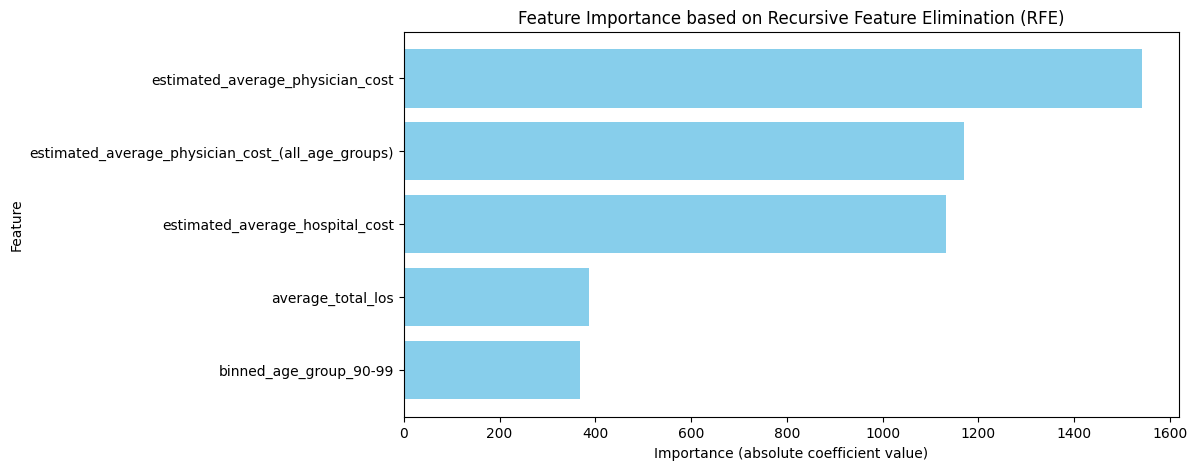

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance (coefficients of the linear regression model)
feature_importance = np.abs(selector.estimator_.coef_)

# Sort features based on importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = selected_features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(sorted_features, sorted_importance, color="skyblue")
plt.xlabel("Importance (absolute coefficient value)")
plt.ylabel("Feature")
plt.title("Feature Importance based on Recursive Feature Elimination (RFE)")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [41]:
#Use embedded method for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)  # Adjust alpha for feature selection strength
lasso.fit(X, y)

# Select features with non-zero coefficients
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Selected Features (Lasso):", selected_features_lasso)


Selected Features (Lasso): Index(['jurisdiction', 'case_mix_group', 'case_mix_group_(description)',
       'age_group', 'volume_(typical_cases)',
       'estimated_average_hospital_cost',
       'estimated_average_hospital_cost_(all_age_groups)',
       'estimated_average_physician_cost',
       'estimated_average_physician_cost_(all_age_groups)',
       'average_acute_los', 'average_alc_los', 'average_total_los',
       'start_year', 'end_year', 'age_category', 'age_numeric',
       'binned_age_group_10-19', 'binned_age_group_20-29',
       'binned_age_group_30-39', 'binned_age_group_40-49',
       'binned_age_group_50-59', 'binned_age_group_60-69',
       'binned_age_group_70-79', 'binned_age_group_80-89',
       'binned_age_group_90-99'],
      dtype='object')


c:\Users\ikjot_0qtl66y\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+11, tolerance: 1.185e+08
  model = cd_fast.enet_coordinate_descent(


## Build Model

In [42]:
import pandas as pd
from pycaret.regression import setup, get_config
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Drop target variable
X = df_no_outliers.drop(columns=["total_estimated_cost"])
y = df_no_outliers["total_estimated_cost"]

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  # Avoid dummy variable trap

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PyCaret setup (using already encoded data)
setup(data=pd.concat([X, y], axis=1), target="total_estimated_cost", session_id=42)

# Get selected features from PyCaret
selected_features = get_config('X').columns  

# Use only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared = rf_model.score(X_test_selected, y_test)

# Print Results
print(f"Random Forest MSE: {mse_rf}")
print(f"R-squared: {r_squared}")


,Description,Value
0,Session id,42
1,Target,total_estimated_cost
2,Target type,Regression
3,Original data shape,"(74547, 26)"
4,Transformed data shape,"(74547, 26)"
5,Transformed train set shape,"(52182, 26)"
6,Transformed test set shape,"(22365, 26)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


Random Forest MSE: 701.0759930607078
R-squared: 0.9999564781942581


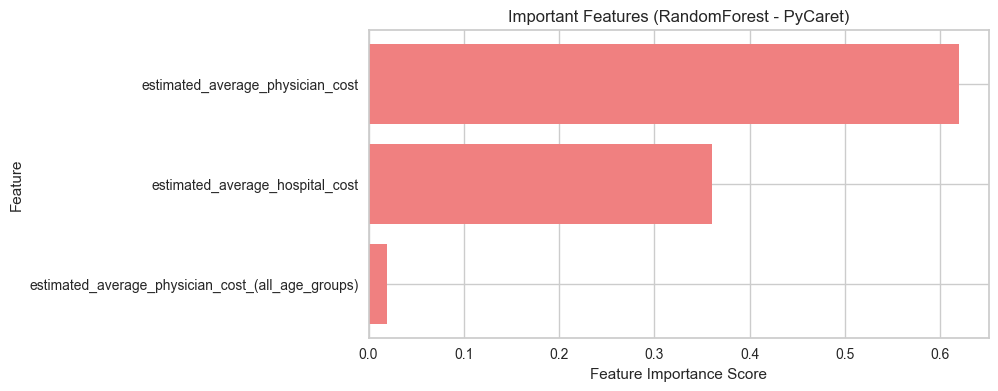

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the trained Random Forest model
feature_importance = rf_model.feature_importances_

# Sort features based on importance
sorted_idx = np.argsort(feature_importance)[::-1]
top_features = np.array(selected_features)[sorted_idx][:3]  # Top 3 features
top_importance = feature_importance[sorted_idx][:3]  # Their importance scores

# Plot top 3 features
plt.figure(figsize=(8, 4))
plt.barh(top_features, top_importance, color="lightcoral")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Important Features (RandomForest - PyCaret)")
plt.gca().invert_yaxis()  # Most important feature on top
plt.show()


In [44]:

# Calculate the range (min and max) for each column in X
x_range = X.agg(['min', 'max']).T
print(x_range)

                                                        min        max
jurisdiction                                              0         12
case_mix_group                                            0        479
case_mix_group_(description)                              0        479
age_group                                                 0          8
volume_(typical_cases)                            -0.686967   3.910226
estimated_average_hospital_cost                   -1.629647   4.670174
estimated_average_hospital_cost_(all_age_groups)  -1.766319   3.468946
estimated_average_physician_cost                  -2.232025   2.769912
estimated_average_physician_cost_(all_age_groups) -2.392243   2.813757
average_acute_los                                  -1.52736   3.037191
average_alc_los                                   -0.205622  27.435284
average_total_los                                 -1.117818   2.885032
start_year                                             2017       2021
end_ye

In [45]:
X_train_selected['age_group'].unique()  # Check the data types and non-null counts of the selected features

array([5, 3, 6, 2, 8, 1, 4, 7, 0])